In [5]:
import seaborn as sns
sns.set_theme(style="darkgrid", font_scale=1)

In [6]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt

import torch

from sklearn.metrics import f1_score

# assume that notebook located in the same directory as felere
from felere.common.datasets import FashionMNISTDataset
from felere.common.distributor import DataDistributor
from felere.optimization.federative.fedavg import FederatedAveraging
from felere.optimization.federative.scaffold import Scaffold

from felere.pipelines.pipeline import Pipeline

from felere.function.torch import TorchFunction
from felere.function.torch_models import FashionMNISTLinearModel

In [7]:
X, y = FashionMNISTDataset().generate(to_float=True)

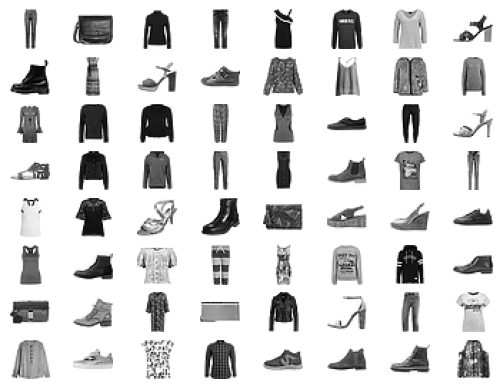

In [8]:
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    img = X[random.randint(0, X.shape[0])]

    plt.imshow(img, cmap=plt.cm.binary)

In [9]:
n_classes = len(np.unique(y))
print(f"{n_classes=}")

n_classes=10


In [10]:
n_features = X.shape[1] * X.shape[2]
n_targets = n_classes

In [11]:
print("reshaping X...")
X = np.float32(X).reshape((X.shape[0], X.shape[1] * X.shape[2]))
print(f"{X.dtype=}")

reshaping X...
X.dtype=dtype('float32')


In [12]:
print(f"{X.shape=}")

X.shape=(70000, 784)


In [13]:
torch_model = FashionMNISTLinearModel(n_features=n_features, n_targets=n_classes)
function = TorchFunction(torch_model, torch.nn.CrossEntropyLoss())

In [14]:
print(f"{torch_model.n_paramaters()=}")

torch_model.n_paramaters()=101770


In [15]:
distributor = DataDistributor(test_size=0.3, server_fraction=0.2)


FederatedAveraging for parameters:  n_clients=96,  iid_fraction=0.0,  clients_fraction=0.2,  batch_size=256
 epochs=128,  rounds=16,  eta=0.005:


learning: 100%|██████████| 16/16 [00:26<00:00,  1.65s/it]


f1_score : 0.4929137385858923

Scaffold for parameters:  n_clients=96,  iid_fraction=0.0,  clients_fraction=0.2,  batch_size=256
 epochs=128,  rounds=16,  eta=0.005:


learning: 100%|██████████| 16/16 [00:35<00:00,  2.24s/it]


f1_score : 0.5846079606965302
done


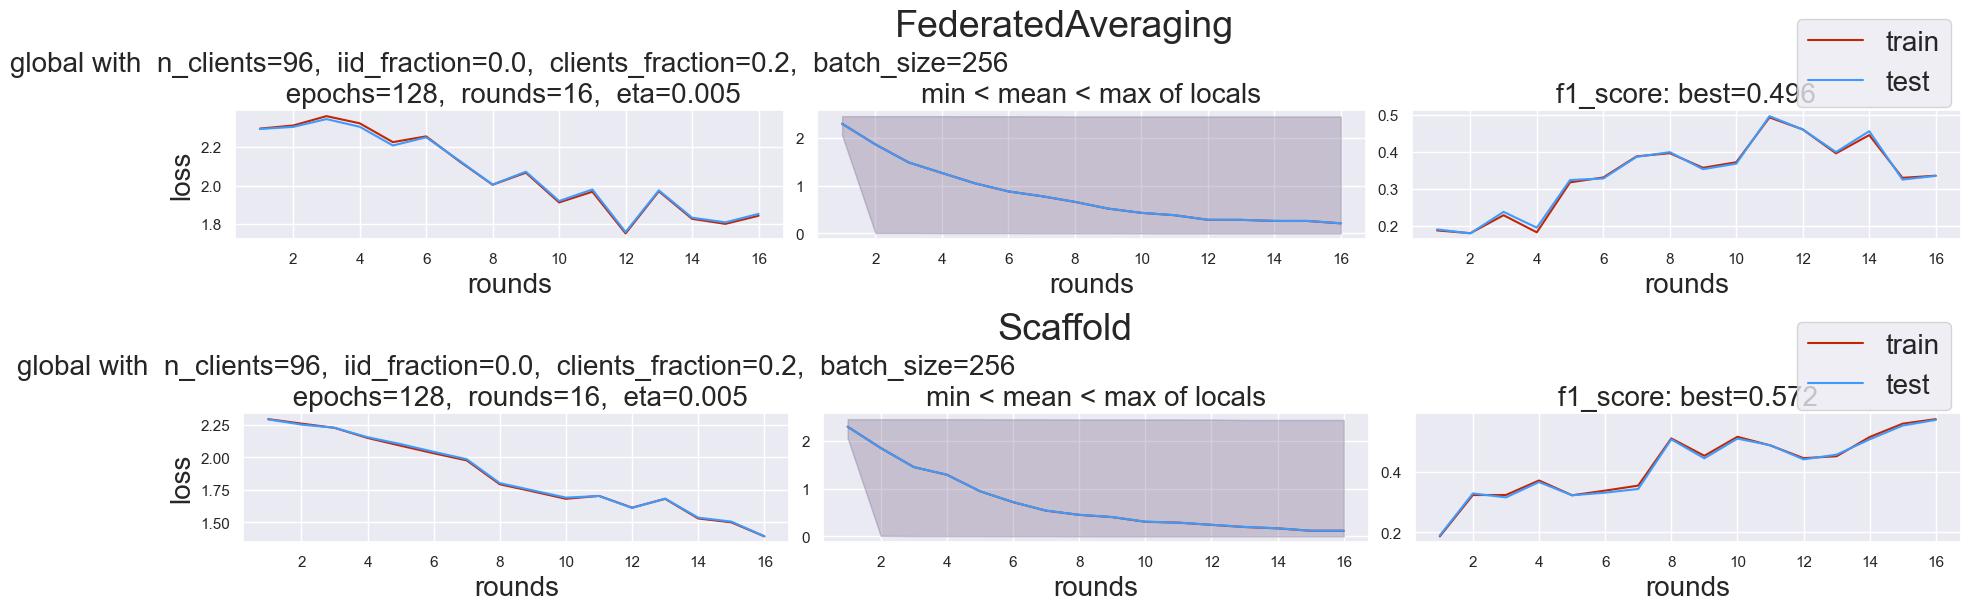

In [17]:
optimizer_parameters = {
  FederatedAveraging : {
    "n_clients" : [96],
    "iid_fraction" : [0.0], 
    "clients_fraction": [0.2],
    "batch_size": [256], 
    "epochs": [128],  
    "rounds": [16],
    "eta": [0.5e-2],
  },
  Scaffold : {
    "n_clients" : [96],
    "iid_fraction" : [0.0],
    "clients_fraction": [0.2],
    "batch_size": [256], 
    "epochs": [128],
    "rounds": [16],
    "eta": [0.5e-2],
  }
}

metrics = {
  "f1_score" : lambda y_proba, y_true: f1_score(np.argmax(y_proba, axis=1), y_true, average="weighted")
}

pipeline = Pipeline(
  function=function,
  metrics=metrics,
  optimizer_parameters=optimizer_parameters,
  distributor=distributor,
  X=X,
  y=y,
  subplot_height=6,
  font_size=20
)

best, best_params = pipeline.run(choose_best_by="f1_score")

print("done")